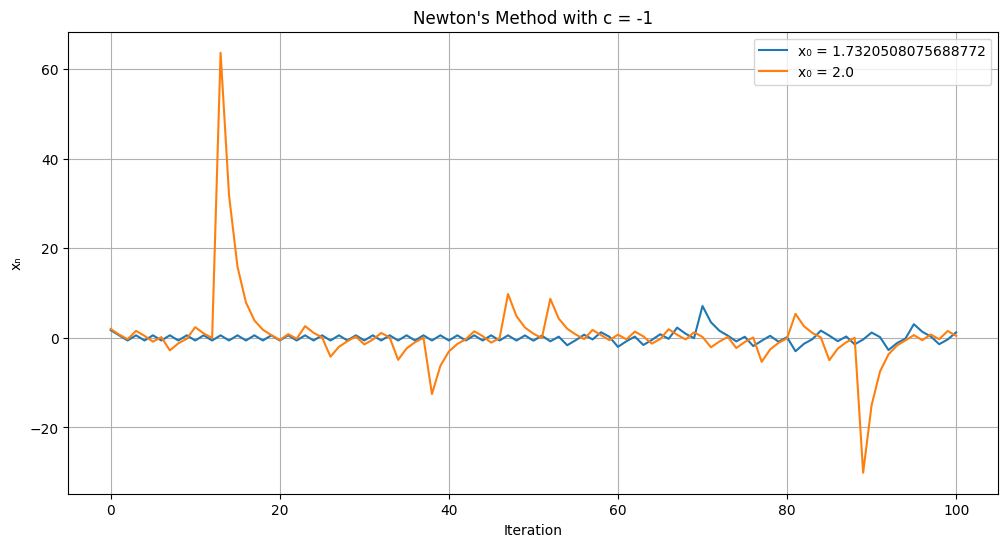

In [1]:
# Chaos Examples Notebook

# Reference:
# This notebook is an implementation of the examples discussed in 
# Strang, Gilbert. Differential Equations and Linear Algebra. Wellesley‑Cambridge Press, 2014.
# Chapter 3.3: "Linearization and Stability in 2D and 3D"
# Section: Continuous Chaos and Discrete Chaos

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

%matplotlib inline
plt.style.use('default')

# 1. Newton's Method with c = -1
def newton_step(x, c=-1):
    return 0.5 * (x + c/x)

# Generate sequences for two different starting points
n_steps = 100
x0_values = [np.sqrt(3), 2.0]
sequences = []

for x0 in x0_values:
    x = x0
    sequence = [x]
    for _ in range(n_steps):
        x = newton_step(x)
        sequence.append(x)
    sequences.append(sequence)

# Plot the results
plt.figure(figsize=(12, 6))
for i, seq in enumerate(sequences):
    plt.plot(range(n_steps + 1), seq, label=f'x₀ = {x0_values[i]}')

plt.title("Newton's Method with c = -1")
plt.xlabel('Iteration')
plt.ylabel('xₙ')
plt.legend()
plt.grid(True)
plt.show()

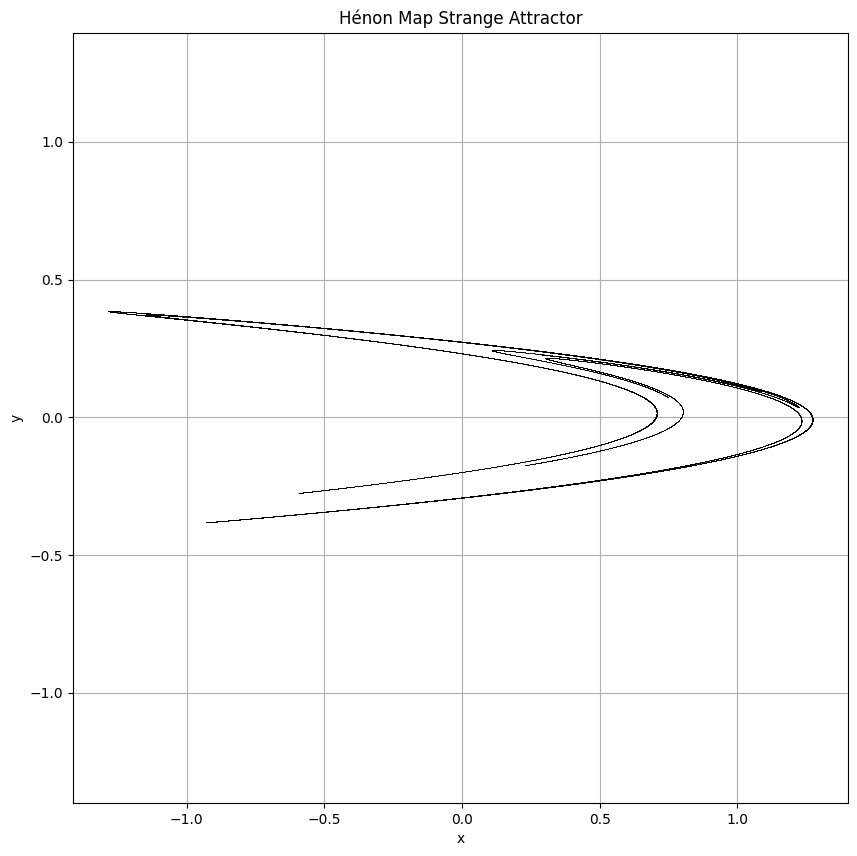

In [9]:
# 2. Hénon Map
def henon_map(x, y, a=1.4, b=0.3):
    new_x = 1 + y - a*x*x
    new_y = b*x

    if np.abs(new_x) > 1e10 or np.abs(new_y) > 1e10:
        return None, None
    return new_x, new_y

# Generate points
n_points = 1000
x0_values = np.linspace(-1, 1, 20)
y0_values = np.linspace(-1, 1, 20)

plt.figure(figsize=(10, 10))

for x0 in x0_values:
    for y0 in y0_values:
        x, y = x0, y0
        valid_trajectory = True
        
        # Skip first 100 iterations (transient)
        # Initial Transient Behavior: When you start iterating the Hénon map from any initial point (x₀, y₀), 
        # the first several iterations often show irregular behavior that isn't representative of the system's 
        # long-term dynamics. These early points are like the "warm-up" phase of the system.
        for _ in range(100):
            next_vals = henon_map(x, y)
            if next_vals[0] is None:  # Overflow detected
                valid_trajectory = False
                break
            x, y = next_vals
        
        # We're also going to check that the trajectory doesn't overflow.
        if not valid_trajectory:
            continue

        xs, ys = [], []
        for _ in range(n_points):
            next_vals = henon_map(x, y)
            if next_vals[0] is None:  # Overflow detected
                valid_trajectory = False
                break
            x, y = next_vals
            xs.append(x)
            ys.append(y)
        
        # Settling onto the Attractor: The Hénon map has what's called a "strange attractor" 
        # - a set of points in the phase space that the system naturally evolves towards. 
        # Points that start outside the attractor will either:
        #   Eventually move onto the attractor (if they're in the basin of attraction)
        #   Or diverge to infinity (if they're outside the basin of attraction)
        if valid_trajectory:
            plt.plot(xs, ys, ',k', alpha=0.1, markersize=0.1)

plt.title('Hénon Map Strange Attractor')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)
plt.show()


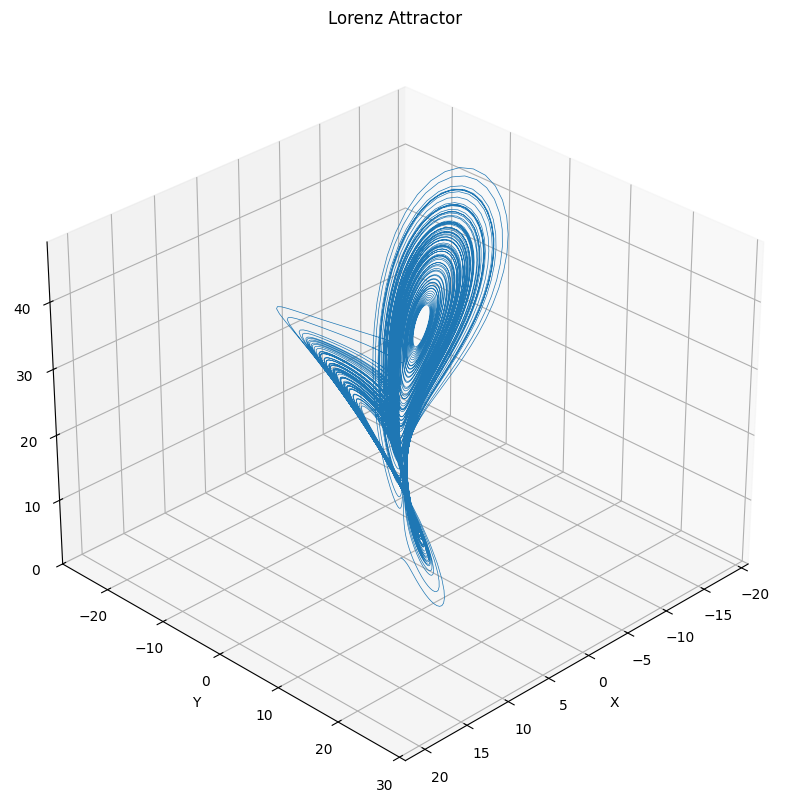

In [11]:
# 3. Lorenz System
def lorenz(state, t, a=10, b=28, c=8/3):
    x, y, z = state
    dx = a * (y - x)
    dy = x * (b - z) - y
    dz = x * y - c * z
    return [dx, dy, dz]

# Set up initial conditions and time points
state0 = [1.0, 1.0, 1.0]
t = np.linspace(0, 100, 10000)

# Solve the system
# This specific code snippet solves the Lorenz system of differential equations using SciPy's odeint 
# (Ordinary Differential Equation INTegrator)
#   lorenz: The function that defines the system (returns [dx/dt, dy/dt, dz/dt])
#   state0: Initial conditions [x₀, y₀, z₀] = [1.0, 1.0, 1.0]
#   t: Time points where we want solutions (np.linspace(0, 100, 10000))
states = odeint(lorenz, state0, t)

# This numerical integration is necessary because the Lorenz system, being chaotic, has no 
# closed-form analytical solution. odeint uses sophisticated numerical methods (typically Runge-Kutta) 
# to approximate the solution by taking small time steps and updating the state variables according 
# to their derivatives.

# Create 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(states[:, 0], states[:, 1], states[:, 2], lw=0.5)
ax.set_title('Lorenz Attractor')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Adjust the viewing angle for better visualization
ax.view_init(30, 45)
plt.show()

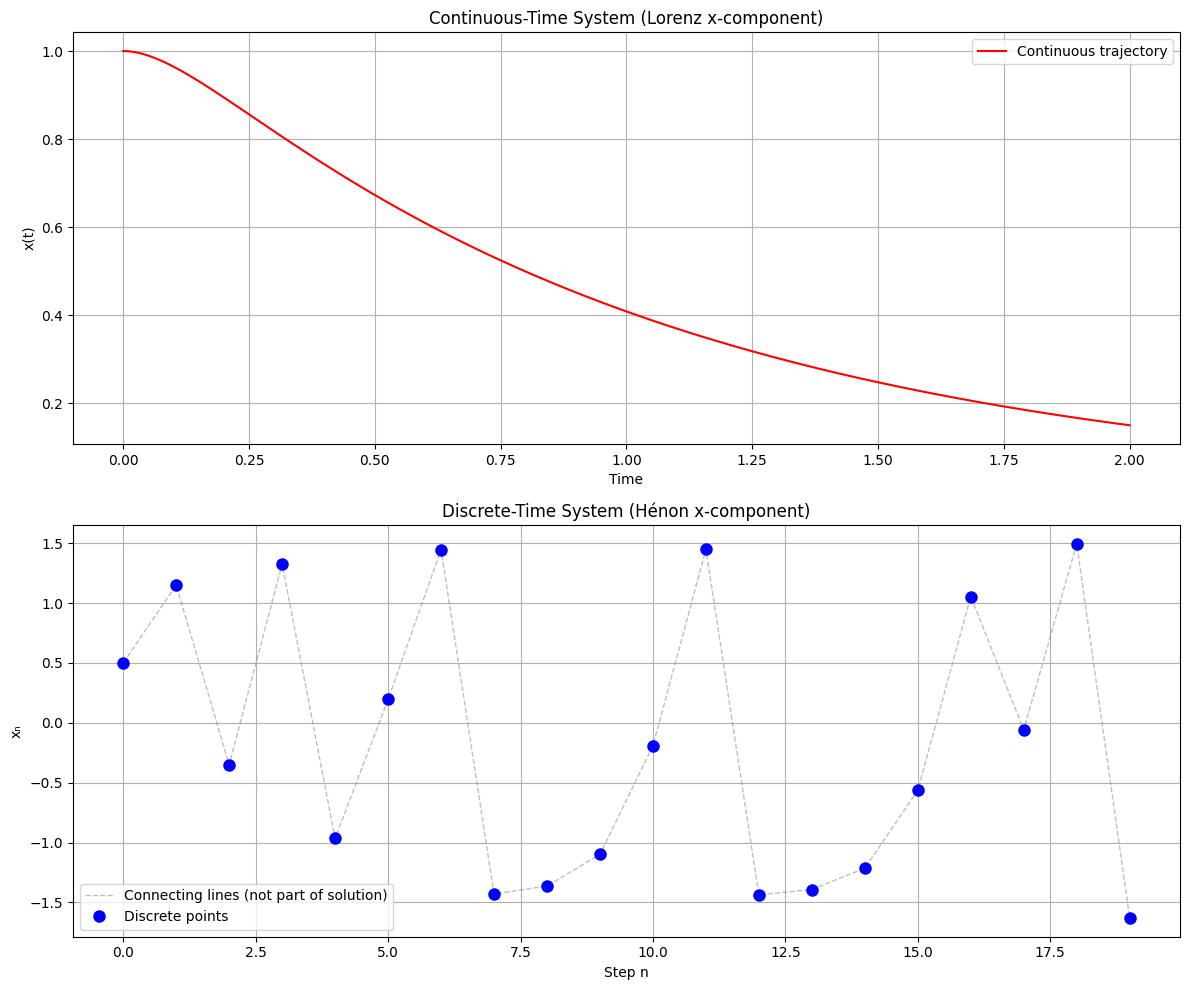


Key Differences:
1. Continuous System:
   - Values exist at ALL points in time
   - Smooth, continuous transitions
   - Described by differential equations (rates of change)

2. Discrete System:
   - Values exist only at specific steps
   - Jumps between states
   - Described by difference equations (next value)


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# 1. Continuous System (Lorenz - just x component)
def lorenz_x(state, t, a=10):
    x, y = state
    dx = a*(y - x)
    dy = -y  # Simplified y equation for clearer visualization
    return [dx, dy]

# Solve continuous system
t_continuous = np.linspace(0, 2, 1000)
initial_state = [1.0, 1.0]
solution = odeint(lorenz_x, initial_state, t_continuous)

# Plot continuous system
ax1.plot(t_continuous, solution[:, 0], 'r-', label='Continuous trajectory')
# ax1.plot(t_continuous, solution[:, 0], 'r.', markersize=3, 
#          label='Points along trajectory')
ax1.set_title('Continuous-Time System (Lorenz x-component)')
ax1.set_xlabel('Time')
ax1.set_ylabel('x(t)')
ax1.grid(True)
ax1.legend()

# 2. Discrete System (Hénon - x component)
def henon_x(x, y, a=1.4):
    return 1 + y - a*x*x

# Generate discrete sequence
n_steps = 20
x = 0.5
y = 0.5
x_sequence = [x]
t_discrete = np.arange(n_steps)

for _ in range(n_steps-1):
    x_new = henon_x(x, y)
    x_sequence.append(x_new)
    x = x_new

# Plot discrete system with clearer distinction
ax2.plot(t_discrete, x_sequence, '--', color='gray', alpha=0.5, linewidth=1,
         label='Connecting lines (not part of solution)')
ax2.plot(t_discrete, x_sequence, 'o', color='blue', markersize=8,
         label='Discrete points')
ax2.set_title('Discrete-Time System (Hénon x-component)')
ax2.set_xlabel('Step n')
ax2.set_ylabel('xₙ')
ax2.grid(True)
ax2.legend()


plt.tight_layout()
plt.show()

# Print explanatory text
print("\nKey Differences:")
print("1. Continuous System:")
print("   - Values exist at ALL points in time")
print("   - Smooth, continuous transitions")
print("   - Described by differential equations (rates of change)")
print("\n2. Discrete System:")
print("   - Values exist only at specific steps")
print("   - Jumps between states")
print("   - Described by difference equations (next value)") 